### Import od necessary libraries

In [2]:
import pyodbc as odbc
import pandas as pd
import sqlalchemy as sa
import matplotlib

### Creating connection with SQL Server Database using pyodbbc + SQLAlchemy

In [3]:
DRIVER_NAME = 'SQL SERVER'
SERVER_NAME = 'DESKTOP-6DMIBIJ'
DATABASE_NAME = 'Olist'

In [4]:
connection_string = f"mssql+pyodbc://@{SERVER_NAME}/{DATABASE_NAME}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"


In [5]:
engine = sa.create_engine(connection_string)

### First insight in Data 

In [179]:
df_customers = pd.read_sql('SELECT* FROM dbo.customers', engine)
print(f"Shape of df_customers: {df_customers.shape}\n")
df_customers.head()

Shape of df_customers: (99441, 5)



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,None,None
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,None,None


In [7]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             67967 non-null  object
 4   customer_state            67967 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [181]:
df_customers.isna().mean()*100

customer_id                  0.000000
customer_unique_id           0.000000
customer_zip_code_prefix     0.000000
customer_city               31.650929
customer_state              31.650929
dtype: float64

<Axes: title={'center': 'Top 5 cities by number of customers'}, xlabel='customer_city'>

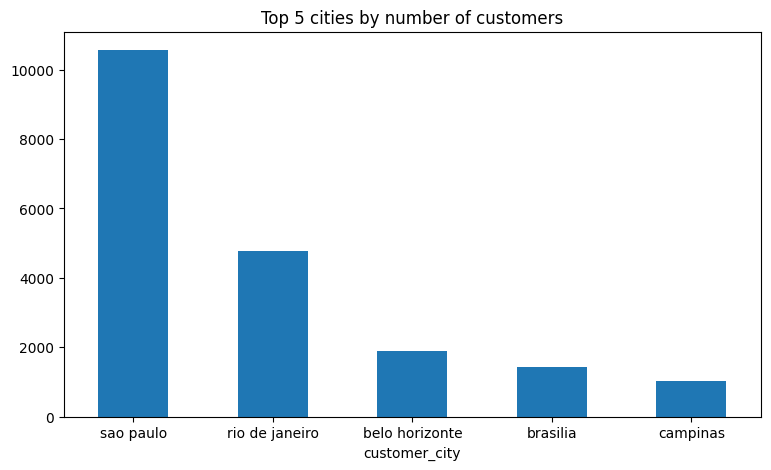

In [ ]:
#df_customers["customer_city"].describe()
# df_customers["customer_city"].value_counts().head().plot.bar(title="Top 5 cities by number of customers", x = "City name", y = "Number of clients", rot = 0, figsize = (9,5))

In [175]:
df_customers.shape

(99441, 5)

In [ ]:
print(f"Number of rows in Customers table: {len(df_customers)}")
print(f"Number of duplicated rows: {len(df_customers[df_customers.duplicated()])}")

Number of rows in Customers table: 99441
Number of duplicated rows: 0


Number of NaN values in df_customers

In [9]:
df_customers.isna().sum()

customer_id                     0
customer_unique_id              0
customer_zip_code_prefix        0
customer_city               31474
customer_state              31474
dtype: int64

10. Z kolumny seller_zip_code_pref i kolumny customer_zip_code_pref usunąć te wiersze które mają ponad 6 znaków/lub zawierają litery

In [10]:
df_customers["customer_zip_code_prefix"] = df_customers["customer_zip_code_prefix"].astype(str)
df_customers[df_customers["customer_zip_code_prefix"].str.len()>6]
df_customers["customer_zip_code_prefix"] = df_customers["customer_zip_code_prefix"].astype(int)
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [11]:
df_geolocation = pd.read_sql('SELECT * FROM dbo.geolocation', engine)
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
print(f"Number of rows in Geolocation table: {len(df_geolocation)}")
print(f"Number of duplicated rows: {len(df_geolocation[df_geolocation.duplicated()])}")


Number of rows in Geolocation table: 1000163
Number of duplicated rows: 271868


Number of NaN values in df_geolocation

In [13]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
df_geolocation[df_geolocation.duplicated()]
a = 1046
b = -23.546081127035535
c = -46.64482029837157
d = "sao paulo"
e = "SP"

df_geolocation[(df_geolocation["geolocation_zip_code_prefix"] == a) & (df_geolocation["geolocation_lat"] == b) & (df_geolocation["geolocation_lng"]==c) & 
               (df_geolocation["geolocation_city"] == d) & (df_geolocation["geolocation_state"] == e)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1,1046,-23.546081,-46.64482,sao paulo,SP
15,1046,-23.546081,-46.64482,sao paulo,SP
44,1046,-23.546081,-46.64482,sao paulo,SP
65,1046,-23.546081,-46.64482,sao paulo,SP
67,1046,-23.546081,-46.64482,sao paulo,SP
82,1046,-23.546081,-46.64482,sao paulo,SP
94,1046,-23.546081,-46.64482,sao paulo,SP
220,1046,-23.546081,-46.64482,sao paulo,SP
252,1046,-23.546081,-46.64482,sao paulo,SP
255,1046,-23.546081,-46.64482,sao paulo,SP


Z df_geolocation nie usuwa się duplikatow/przynajmniej narazie 

In [15]:
df_geolocation["geolocation_city"].value_counts()

geolocation_city
sao paulo                    160718
rio de janeiro                62151
belo horizonte                27805
curitiba                      16593
porto alegre                  13521
                              ...  
vitorinos - alto rio doce         1
sao sebastiao dos torres          1
sao sebastiao da vitória          1
mantiqueira do palmital           1
itapucá                           1
Name: count, Length: 7560, dtype: int64

Trzeba zrobić transformacje na danych - żeby usunąć wszystkie hiszpańskie znaki, następnie sprawdze ile jest takich przypadków że jest inne miasto i stan dla tego samego zip code

Before deleting hispanic letters from geolocation city

In [16]:
df_geolocation[df_geolocation["geolocation_city"] == "maquiné"]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
337778,95530,-29.676724,-50.199656,maquiné,RS
338732,95530,-29.675123,-50.203880,maquiné,RS


Checking number of rows with hispanic letters

In [17]:
spanish_chars  = ['á', 'é', 'í', 'ó', 'ú', 'ñ', 'Á', 'É', 'Í', 'Ó', 'Ú', 'Ñ']

In [18]:
'|'.join(spanish_chars)

'á|é|í|ó|ú|ñ|Á|É|Í|Ó|Ú|Ñ'

In [19]:
mask = df_geolocation["geolocation_city"].str.contains('|'.join(spanish_chars))
print(f"Number of rows with hispanic chars: {len(df_geolocation[mask])}")
print(f"Number of cities with hispanic chars: {df_geolocation.loc[mask,"geolocation_city"].nunique()}")
df_geolocation[mask].head()

Number of rows with hispanic chars: 29719
Number of cities with hispanic chars: 1222


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
61340,65081,-2.557062,-44.240918,sao luís,MA
61348,65071,-2.487994,-44.247180,sao luís,MA
61349,65070,-2.516840,-44.257065,sao luís,MA
61352,65068,-2.501043,-44.235078,sao luís,MA
61353,65083,-2.508166,-44.236216,sao luís,MA


In [20]:
replace_dict = {
    'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ñ': 'n', 'ç': 'c',
    'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U', 'Ñ': 'N', 'Ç': 'C'
}

for old_val, new_val in replace_dict.items():
    df_geolocation["geolocation_city"] = df_geolocation["geolocation_city"].str.replace(old_val, new_val)
    
df_geolocation["geolocation_city"] = df_geolocation["geolocation_city"].str.replace(r"[-'']", '', regex=True)

And after 

In [21]:
mask = df_geolocation["geolocation_city"].str.contains('|'.join(spanish_chars))
df_geolocation.loc[mask,"geolocation_city"]

Series([], Name: geolocation_city, dtype: object)

In [22]:
print(f"Number of rows with hispanic chars: {len(df_geolocation[mask])}")
print(f"Number of cities with hispanic chars: {df_geolocation.loc[mask,"geolocation_city"].nunique()}")

Number of rows with hispanic chars: 0
Number of cities with hispanic chars: 0


1.  Z 'olist_customer_dataset' usunąć niektóre customer_city i customer_state, na podstawie zachowanego zip_code będzie można je uzupełnić 
odpowiadającymi wartościami z tabeli 'olist_geolocation_dataset'


Najpierw sprawdzamy ile customer_zip_code_prefix jest takich które mają WSZYSTKIE city i state jako NULL</br>
Kod SQL który wyświetla te zip_cody i ile razy występują</br>
  SELECT  c.customer_zip_code_prefix, COUNT(c.customer_zip_code_prefix)  FROM customers c
  WHERE NOT EXISTS (SELECT 1 FROM dbo.customers c2 WHERE c.customer_zip_code_prefix = c2.customer_zip_code_prefix AND c2.customer_city IS NOT NULL)
  GROUP BY c.customer_zip_code_prefix
  ORDER BY COUNT(c.customer_zip_code_prefix) DESC

In [23]:
zip_code_not_empty = df_customers[(df_customers['customer_state'].notna()) & (df_customers['customer_city'].notna())]['customer_zip_code_prefix'].unique() 
# ODPOWIADAJACY KOD SQL POWYZSZEJ LINII:
# SELECT COUNT(DISTINCT customer_zip_code_prefix) FROM dbo.customers 
# WHERE customer_state IS NOT NULL AND customer_city IS NOT NULL
filtered = df_customers[~df_customers['customer_zip_code_prefix'].isin(zip_code_not_empty)]
result = filtered.groupby("customer_zip_code_prefix").size().reset_index(name="l")
print(result["l"].sum()) # -> Liczba wierszy dla customer_zip_code dla których nie ma ani jednego uzupełnionego wiersza w customers (state i country)
result.sort_values(by = ["l"], ascending = False)

1692


,customer_zip_code_prefix,l
335,18606,6
149,4657,6
1014,78115,6
172,5203,5
12,1331,5
...,...,...
1209,96460,1
1210,96540,1
1211,96824,1
1212,96843,1


Jest 1246 unikalnych customer_zip_code_prefix z tabeli df_customers które nie mają ani jednego uzupełnionego wiersza dla state i city, które razem dają 1692 wiersze

Teraz trzeba by dla tych zip codeow ktore sa powyzej zaciagnac dane z tabeli geolocation (bo dla nich dane sie nie powielają z customers)

In [24]:
zip_code_list_of_full_nulls = result["customer_zip_code_prefix"].to_list()
zip_code_list_of_full_nulls[:5]

[1003, 1016, 1021, 1022, 1023]

Teraz sprawdzenie ile jest takich przypadkow gdzie sa rozne city dla tego samego zip_code, weryfikacja czy funkcja która bierze te drugie city i state jest w ogole potrzebna

In [25]:
df_nunique_city = df_geolocation.groupby("geolocation_zip_code_prefix")["geolocation_city"].nunique()
df_nunique_city[df_nunique_city > 2]

geolocation_zip_code_prefix
9780     3
13318    3
13454    3
13855    3
17970    3
25936    3
27163    3
28950    3
28993    3
35315    3
35411    3
35413    3
36206    3
38295    3
38749    3
42820    3
42841    3
45816    3
45936    4
55485    3
57925    3
65935    4
68695    3
72220    3
72231    3
72270    3
76958    3
85139    4
87365    3
Name: geolocation_city, dtype: int64

29 jest różnych zip code'ow, dla ktorych jest rozne miasto (zazwyczaj jest i tak to samo miasto, tylko inaczej zapisane)

In [26]:
df_geolocation.loc[df_geolocation["geolocation_zip_code_prefix"] == 42850]["geolocation_city"].value_counts()

geolocation_city
dias davila     185
dias d avila     13
Name: count, dtype: int64

In [27]:
# DZIALA NA WPROWADZNIE PIEWSZEJ WARTOŚCI WYSTĄPIENIA 

print(f"Przed uzupełnieniem fragmentu brakujących danych: {(df_customers["customer_state"].notna().sum())}")
mask = df_customers["customer_zip_code_prefix"].isin(zip_code_list_of_full_nulls)
df_customers.loc[mask,"customer_state"] = df_customers.loc[mask,"customer_state"].fillna(df_geolocation["geolocation_state"])
df_customers.loc[mask,"customer_city"] = df_customers.loc[mask,"customer_city"].fillna(df_geolocation["geolocation_city"])
df_customers[mask]
print(f"Po uzupełnieniu brakujących danych: {df_customers["customer_state"].notna().sum()}")

Przed uzupełnieniem fragmentu brakujących danych: 67967
Po uzupełnieniu brakujących danych: 69659


69659 - 67967 = 1692 -> Zgadza się, tyle było wartości customer_zip_code_prefix które nie miały ŻADNEGO uzupełnionego wiersza, a teraz są uzupełnione

Potem sprawdzamy ile jest takich customer_zip_code_prefix które mają wpisane NULL w city i state, ale mają też uzuepłnione dane w innym wierszu</br>
   SELECT  c.customer_zip_code_prefix, COUNT(c.customer_zip_code_prefix)  FROM customers c
  WHERE EXISTS (SELECT 1 FROM dbo.customers c2 WHERE c.customer_zip_code_prefix = c2.customer_zip_code_prefix AND c2.customer_city IS NOT NULL)
  GROUP BY c.customer_zip_code_prefix
  ORDER BY COUNT(c.customer_zip_code_prefix) DESC

In [28]:
print(f"Pozostałe brakujące dane dla customer_state: {df_customers["customer_state"].isna().sum()}")
print(f"Pozostałe brakujące dane dla customer_city: {df_customers["customer_city"].isna().sum()}")

Pozostałe brakujące dane dla customer_state: 29782
Pozostałe brakujące dane dla customer_city: 29782


In [29]:
df_customers["customer_state"] = df_customers.groupby(by="customer_zip_code_prefix")["customer_state"].transform("first")
df_customers["customer_city"] = df_customers.groupby(by="customer_zip_code_prefix")["customer_city"].transform("first")

print(f"Pozostałe brakujące dane dla customer_state:  {df_customers["customer_state"].isna().sum()}")
print(f"Pozostałe brakujące dane dla customer_city: {df_customers["customer_city"].isna().sum()}")


Pozostałe brakujące dane dla customer_state:  0
Pozostałe brakujące dane dla customer_city: 0


In [30]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

5. Usunięcie dla niektórych wartości z kolumny seller_city z tabeli 'olist_sellers_dataset' i uzupełnienie ich na podstawie zachowanego seller_zip_code_prefix

In [31]:
df_sellers = pd.read_sql('SELECT * FROM dbo.sellers', engine)
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP
1,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES
2,001e6ad469a905060d959994f1b41e4f,24754,sao goncalo,RJ
3,002100f778ceb8431b7a1020ff7ab48f,14405,None,SP
4,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO


In [32]:
print(f"Number of rows in Sellers table: {len(df_sellers)}")
print(f"Number of duplicated rows: {len(df_sellers[df_sellers.duplicated()])}")

Number of rows in Sellers table: 3095
Number of duplicated rows: 0


Number of NaN values in df_sellers

In [33]:
df_sellers.isna().sum()

seller_id                   0
seller_zip_code_prefix      0
seller_city               705
seller_state                0
dtype: int64

In [34]:
df_sellers["seller_zip_code_prefix"] = df_sellers["seller_zip_code_prefix"].astype(str)
mask = df_sellers["seller_zip_code_prefix"].str.len() >= 6
df_sellers = df_sellers.loc[~mask, ]
df_sellers["seller_zip_code_prefix"] = df_sellers["seller_zip_code_prefix"].astype(int)
df_sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Some rows with empty seller city

In [35]:
mask = df_sellers["seller_city"].isna()
df_sellers.loc[mask].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3,002100f778ceb8431b7a1020ff7ab48f,14405,None,SP
5,004c9cd9d87a3c30c522c48c4fc07416,14940,None,SP
7,00ab3eff1b5192e5f1a63bcecfee11c8,4164,None,SP
13,011b0eaba87386a2ae96a7d32bb531d1,17580,None,SP
18,0176f73cc1195f367f7b32db1e5b3aa8,14940,None,SP


In [36]:
df_geolocation.reset_index(inplace = True)
df_sellers.reset_index(inplace = True)

In [37]:
mapping = df_geolocation.groupby("geolocation_zip_code_prefix")["geolocation_city"].first()
mapping.head()

geolocation_zip_code_prefix
1001    sao paulo
1002    sao paulo
1003    sao paulo
1004    sao paulo
1005    sao paulo
Name: geolocation_city, dtype: object

In [38]:
df_sellers[mask]

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
3,3,002100f778ceb8431b7a1020ff7ab48f,14405,None,SP
5,5,004c9cd9d87a3c30c522c48c4fc07416,14940,None,SP
7,7,00ab3eff1b5192e5f1a63bcecfee11c8,4164,None,SP
13,13,011b0eaba87386a2ae96a7d32bb531d1,17580,None,SP
18,18,0176f73cc1195f367f7b32db1e5b3aa8,14940,None,SP
...,...,...,...,...,...
3069,3069,fe8055980a4ff7f64ed889c2b5926929,81925,None,PR
3070,3070,fe87f472055fbcf1d7e691c00b1560dc,13085,None,SP
3082,3082,ff314fa6033cc68ec451c47aee2d6ba4,5424,None,SP
3089,3089,ffc470761de7d0232558ba5e786e57b7,7091,None,SP


In [39]:
df_sellers.loc[mask,"seller_city"] = df_sellers.loc[mask,"seller_city"].fillna(df_sellers["seller_zip_code_prefix"].map(mapping))
df_sellers[df_sellers["seller_zip_code_prefix"] == 76804]

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
606,606,3364a91ec4d56c98e44174de954b94f6,76804,porto velho,RO


In [40]:
df_sellers[df_sellers["seller_city"].isna()]

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
1088,1088,5962468f885ea01a1b6a97a218797b0a,82040,NaN,PR


Jest 1 seller_city dla którego nie ma odpowiednika w geolocation - ten wiersz pewnie trzeba będzie usunąć

2. Usunięcie dla niektórych wartości z kolumny payment_value z tabeli 'olist_order_payments_dataset', tą wartość będzie można obliczyć 
z tabeli 'olist_order_items_dataset' sumując wartości price + freight_value dla konkretnego order_id

In [41]:
df_order_payments = pd.read_sql('SELECT * FROM dbo.order_payments', engine)
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,NaN
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,NaN


<Axes: title={'center': 'Number of payments made in each payment type'}, xlabel='payment_type'>

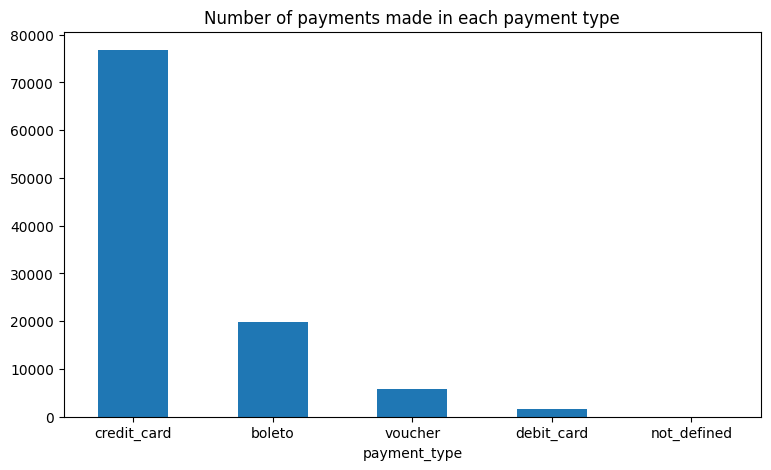

In [207]:
df_order_payments["payment_type"].value_counts().plot.bar(title = "Number of payments made in each payment type", x = "payment type", y = "number of payments", rot = 0, figsize = (9,5))

In [ ]:
print(f"Number of rows in order payments table: {len(df_order_payments)}")
print(f"Number of duplicated rows: {len(df_order_payments[df_order_payments.duplicated()])}")

Number of rows in Sellers table: 103886
Number of duplicated rows: 0



Number of NaN values in df_sellers

In [43]:
df_order_payments.isna().sum()

order_id                    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value           19572
dtype: int64

In [44]:
mask = df_order_payments["payment_value"] < 0
df_order_payments = df_order_payments.loc[~mask]
df_order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [45]:
df_order_items = pd.read_sql('SELECT * FROM dbo.order_items', engine)
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [46]:
print(f"Number of rows in Sellers table: {len(df_order_items)}")
print(f"Number of duplicated rows: {len(df_order_items[df_order_items.duplicated()])}")

Number of rows in Sellers table: 112650
Number of duplicated rows: 0



Number of NaN values in df_sellers

In [47]:
df_sellers.isna().sum()

index                     0
seller_id                 0
seller_zip_code_prefix    0
seller_city               1
seller_state              0
dtype: int64

13. Sprawdzneie ile jest rekordów dla których price/payment_value/freight <= 0

In [48]:
mask = (df_order_items["price"] < 0) | (df_order_items["freight_value"] < 0)
df_order_items = df_order_items.loc[~mask,]
df_order_items.head(1)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [49]:
mask = (df_order_items["price"] <= 0) #| 
print(f"Number of items which have price lower or equal to zero: {len(df_order_items[mask])}")
mask = (df_order_items["freight_value"] <= 0)
print(f"Number of items which have freight value lower or equal to zero: {len(df_order_items[mask])}")

Number of items which have price lower or equal to zero: 0
Number of items which have freight value lower or equal to zero: 383


Możliwa przyczyna dlaczego dostawa była za darmo, to np. kody rabatowe, zamówienie powyzej okreslonej kwoty, stały klient itp.

In [50]:
df_order_items["payment_value"] = df_order_items["price"] + df_order_items["freight_value"]

In [51]:
print(len(df_order_payments))
df_order_payments["order_id"].nunique()

103886


99440

In [52]:
#for i in df_order_payments.columns:
#    print(f"Liczba pustych wierszy dla kolumny {i}: ",df_order_payments[i].isna().sum())
df_order_payments.isna().sum()

order_id                    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value           19572
dtype: int64

In [53]:
print(len(df_order_items))
df_order_items["order_id"].nunique()

112650


98666

In [54]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
payment_value          0
dtype: int64

Trzeba sprawdzić ile jest takich zamówień po order_id które mają dla jednego wiersza uzupełnioną cene a dla drugiego nie mają</br>
Tutaj trzeba będzie też sprawdzić coś takiego że jak w tabeli order_payments są wiersze które w ramach jednego zamówienia mają część danych uzupełnionych a część nie (kilka wiersz w tabeli order_payments to trzeba tą brakującą ilośc podzielić przez liczbę pustych wierszy i wstawić do tabeli payments)

In [55]:
df_order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


Nastepnie trzeba bedzie podzielic roznice miedzy items a payments przez liczbe pustych wierszy dla danego order_id i uzupełnić brakujące wiersze dla payments

In [56]:
df_order_payments[df_order_payments["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
7141,fa65dad1b0e818e3ccc5cb0e39231352,22,voucher,1,4.03
7224,fa65dad1b0e818e3ccc5cb0e39231352,23,voucher,1,18.86
7875,fa65dad1b0e818e3ccc5cb0e39231352,24,voucher,1,0.42
10147,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
12720,fa65dad1b0e818e3ccc5cb0e39231352,26,voucher,1,28.27
16191,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,NaN
20907,fa65dad1b0e818e3ccc5cb0e39231352,3,voucher,1,NaN
23860,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,NaN
26151,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,NaN


In [57]:
order_payment_value_nulls = df_order_payments[df_order_payments["payment_value"].isna()]["order_id"]
part_empty_payment_value = df_order_payments[df_order_payments["order_id"].isin(order_payment_value_nulls)]
current_payment_val = part_empty_payment_value["payment_value"][part_empty_payment_value["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352"].sum() 
part_empty_payment_value # part_empty_payment_value zawiera takie order_id dla których wszystkie wiersze payment_value są nie uzupełnione 
# LUB takie order_id dla których payment_value jest dla niektórych wierszy częściowo uzupełnione a częściowo nie 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,NaN
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,NaN
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,NaN
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,NaN
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,NaN
...,...,...,...,...,...
103525,59d02be1c50fb6e6930cafd6ff6a31e5,8,voucher,1,14.20
103551,086cb9cd0cf7067d77fe09f31620a52b,4,voucher,1,40.48
103795,c27a26005da9b758c804674cc9aa2da1,4,voucher,1,100.00
103805,d8d126f05b944cb1a5d78542e4a34f9a,2,voucher,1,37.66


In [58]:
mapping = df_order_items.groupby("order_id")["payment_value"].first().copy()
mapping

order_id
00010242fe8c5a6d1ba2dd792cb16214     72.19
00018f77f2f0320c557190d7a144bdd3    259.83
000229ec398224ef6ca0657da4fc703e    216.87
00024acbcdf0a6daa1e931b038114c75     25.78
00042b26cf59d7ce69dfabb4e55b4fd9    218.04
                                     ...  
fffc94f6ce00a00581880bf54a75a037    343.40
fffcd46ef2263f404302a634eb57f7eb    386.53
fffce4705a9662cd70adb13d4a31832d    116.85
fffe18544ffabc95dfada21779c9644f     64.71
fffe41c64501cc87c801fd61db3f6244     55.79
Name: payment_value, Length: 98666, dtype: float64

In [59]:
full_payments_value = df_order_items.groupby("order_id")["payment_value"].sum()
#full_payments_value["fedcd9f7ccdc8cba3a18defedd1a5547"]

In [60]:
for order_id, group in part_empty_payment_value.groupby(by="order_id"):
    # Jeśli grupa jest jednoelementowa to całość kwoty będzie brana z order_items
    try:
        if len(group) == 1:
            part_empty_payment_value.loc[group.index,"payment_value"] = group["payment_value"].fillna(group["order_id"].map(mapping))
        
        else: 
            current_payment_sum = group["payment_value"].sum()
            full_value = full_payments_value[group["order_id"]][0]
            mask = group["payment_value"].isna()
            nan_counts = len(mask[mask])
            value_to_fulfill = (full_value - current_payment_sum)/nan_counts
            part_empty_payment_value.loc[group.index,"payment_value"] = group["payment_value"].fillna(value_to_fulfill)
        
    except KeyError:
        continue

C:\Users\PW\AppData\Local\Temp\ipykernel_1076\2691846585.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  full_value = full_payments_value[group["order_id"]][0]
C:\Users\PW\AppData\Local\Temp\ipykernel_1076\2691846585.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  full_value = full_payments_value[group["order_id"]][0]
C:\Users\PW\AppData\Local\Temp\ipykernel_1076\2691846585.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

In [61]:
mask = part_empty_payment_value["payment_value"].isna()
part_empty_payment_value.loc[mask]["order_id"].value_counts()

order_id
0b398dbb3e7c81005f3c69b01488c4c9    3
cdf36cd4632fe33085adec5cf3d6b306    2
6ec704c9a120baaa6b3e162255ec684b    2
c037dd9db2ac27aa44381219612e91ba    1
bd7585a77f0aa76b3775bb68fb293356    1
                                   ..
d8a40a1358d3b2dca231abdaa566b054    1
15ec3d48383c58c0dc96cd66f8884630    1
115b01b1f77f0e02812425b6f5cd8f2f    1
85a22eb264ad44ff56c4955a66876fed    1
35de4050331c6c644cddc86f4f2d0d64    1
Name: count, Length: 152, dtype: int64

In [62]:
part_empty_payment_value["payment_value"].isna().sum()

np.int64(156)

Po uzupełnieniu brakujących danych zostało 156 wierszy które nie mają uzupełnionych payment_value, z czego jest 152 unikalnych order_id (czyli takich pustych wierszy które nie mają swojego odzwierciedlenia w order_items - Te wiersze będzie można usunąć)

4. Usunięcie dla niektórych wartości z kolumny order_estimated_delivery_date dla tabeli 'olist_orders_dataset' i następnie uzupełnienie poprzez sumę order_purchase_timestamp + 30 dni (przyjmujemy takie założenie że gdzie jest nieuzupełnione tam będzie dostarczone za miesiąc) / LUB na podstawie mediany czasu dostarczenia zamówień dla tego seller_city i customer_city 

In [63]:
df_orders = pd.read_sql('SELECT * FROM dbo.orders', engine)
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [187]:
df_orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [ ]:
print(f"Number of rows in Orders table: {len(df_orders)}")
print(f"Number of duplicated rows: {len(df_orders[df_orders.duplicated()])}")

Number of rows in Sellers table: 99441
Number of duplicated rows: 0


Number of NaN values in df_sellers

In [65]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date     339
dtype: int64

15. Sprawdzić czy są sytuacje w których jest data dostarczenia zamówienia klientowi lub do dostawczy wcześniejsza niż złożenie zamówienia (błąd logiczny)

In [66]:
mask_check1 = (df_orders["order_purchase_timestamp"] > df_orders["order_approved_at"]) 
print(f"Number of orders that have later datetime of purchase than datetime of order approved: {len(df_orders.loc[mask_check1,])}")
mask_check2 = (df_orders["order_purchase_timestamp"] > df_orders["order_delivered_carrier_date"])
print(f"Number of rows that have later dateime of purchase than datetime of order carrier delivered: {len(df_orders.loc[mask_check2,])}")
order_list = df_orders["order_id"].loc[mask_check2,]
mask_check3 = (df_orders["order_purchase_timestamp"] > df_orders["order_delivered_customer_date"])
print(f"Number of rows taht have later datetime of purchase than datetime of order delivered to customer: {len(df_orders.loc[mask_check3,])}")
mask_check4 = (df_orders["order_purchase_timestamp"] > df_orders["order_estimated_delivery_date"])
print(f"Number of rows taht have later datetime of purchase than datetime of estimated delivery datetime: {len(df_orders.loc[mask_check4,])}")

Number of orders that have later datetime of purchase than datetime of order approved: 0
Number of rows that have later dateime of purchase than datetime of order carrier delivered: 166
Number of rows taht have later datetime of purchase than datetime of order delivered to customer: 0
Number of rows taht have later datetime of purchase than datetime of estimated delivery datetime: 0


<Axes: title={'center': 'Number and status of orders that have later date of purchase than delivered carried date'}, xlabel='order_status'>

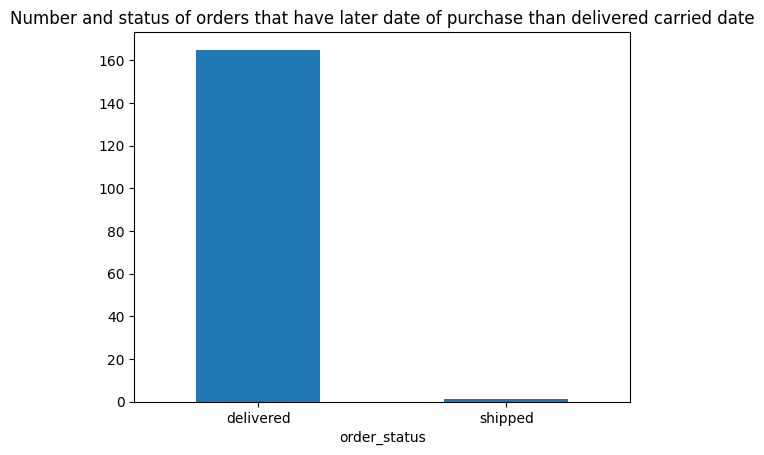

In [67]:
df_orders[df_orders["order_id"].isin(order_list)]["order_status"].value_counts().plot.bar(title = "Number and status of orders that have later date of purchase than delivered carried date",
                                                                                          rot = 0)

Wyjaśnienie: Prawdopodobnie wynika to z błędu działania systemu ?

kontynuacja 4

In [68]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date     339
dtype: int64

In [69]:
mask = df_orders["order_estimated_delivery_date"].isna() & df_orders["order_approved_at"].notna()
orders = df_orders.loc[mask,"order_id"].to_list()
orders[:5]

['00571ded73b3c061925584feab0db425',
 '01855f880aae9a984c7c33b26fcf2e02',
 '01a75ac3dd000b7628a684be97c29234',
 '02aec12849744e266394182861265286',
 '0341b60065c49221a27293793f11b117']

14. Sprawdzenie czy są takie sytuacje i (?) Usunięcie tych rekordów z 'olist_order_items_dataset' które nie występują w 'olist_orders_dataset' 

In [70]:
len(df_orders)

99441

In [71]:
orders_list = df_order_items["order_id"]
df_orders[~df_orders["order_id"].isin(orders_list)]["order_id"].nunique()

775

Jest 775 takich unikalnych order_id z tabeli orders które nie występują w tabeli order_items, są to zamówienia ze statusami

<Axes: title={'center': 'Number of order_ids in table order_items that doesnt exists in orders table'}, xlabel='order_status'>

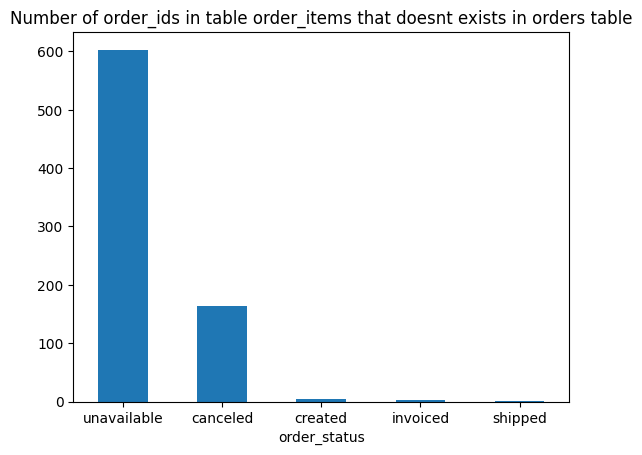

In [72]:
df_orders[~df_orders["order_id"].isin(orders_list)]["order_status"].value_counts().plot.bar(title="Number of order_ids in table order_items that doesnt exists in orders table", 
                                                                                            x = "order status", y="number of orders", rot = 0)

4 - kontynuacja I teraz na podstawie tej listy zamówień trzeba obliczyć jaki jest średni czas dostarczenia zamówienia od danego seller_city do customer_city na podstawie zamówień archiwalnych </br>
W tym celu potrzebuje tabel Customers, Sellers, geolocation</br>
Sellers ma brakujące dane w city i state, dlatego trzeba się cofnąć i po I transoformacji zrobić transformacje dla tabeli Sellers (i wprowadzić brakujące dane)

In [215]:
df_order_items = pd.read_sql('SELECT * FROM dbo.order_items', engine)
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [209]:
df_order_items["freight_value"].describe()

count    98666.000000
mean        20.201927
std         15.909873
min          0.000000
25%         13.310000
50%         16.360000
75%         21.230000
max        409.680000
Name: freight_value, dtype: float64

In [236]:
unique_orders = df_order_items.groupby(by="order_id")['order_item_id'].idxmax()
df_order_items.loc[unique_orders]["order_item_id"].value_counts()

order_item_id
1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
10        8
12        5
11        4
9         3
20        2
14        2
15        2
13        1
21        1
Name: count, dtype: int64

In [220]:
df_order_items["order_item_id"].value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

In [74]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [75]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [76]:
df_sellers = df_sellers.dropna()

In [77]:
df_sellers.isna().sum()

index                     0
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [78]:
df_geolocation.isna().sum()

index                          0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [79]:
orders[0]

'00571ded73b3c061925584feab0db425'

In [80]:
mask = df_orders["order_purchase_timestamp"].notna() & df_orders["order_delivered_customer_date"].notna()
#df_orders[mask].isna().sum()
df_orders_calc = df_orders.loc[mask]
df_orders_calc.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 14
order_delivered_carrier_date       1
order_delivered_customer_date      0
order_estimated_delivery_date    328
dtype: int64

In [81]:
df_orders_calc.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29


In [82]:
df_order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [83]:
df_order_items = df_order_items.drop_duplicates(subset = "order_id", keep="first") #[df_order_items["order_id"].unique()]
len(df_order_items)

98666

In [84]:
print(len(df_order_items))
print(len(df_orders_calc))

98666
96476


In [85]:
merged = (df_order_items.merge(df_orders_calc[["order_id","customer_id","order_purchase_timestamp","order_delivered_customer_date"]], on="order_id")
                        .merge(df_customers[["customer_id","customer_city"]], on = "customer_id")
                        .merge(df_sellers[["seller_id","seller_city"]], on = "seller_id")

)
merged["number_of_days_to_deliver"] = (merged["order_delivered_customer_date"] - merged["order_purchase_timestamp"])
merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,customer_city,seller_city,number_of_days_to_deliver
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,campos dos goytacazes,volta redonda,7 days 14:44:46
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,santa fe do sul,sao paulo,16 days 05:11:18
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,para de minas,borda da mata,7 days 22:45:45
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,atibaia,franca,6 days 03:32:04
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,varzea paulista,loanda,25 days 02:44:40


In [86]:
# merged["number_of_days_to_deliver"] = merged["number_of_days_to_deliver"].apply(lambda x:x.days)

In [87]:
merged.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_purchase_timestamp         0
order_delivered_customer_date    0
customer_city                    0
seller_city                      0
number_of_days_to_deliver        0
dtype: int64

In [88]:
len(merged)

96470

To jest ramka danych będąca "slownikiem" średniego czasu liczby dni dostaw między dwoma miastami (customer_city - seller_city)

In [89]:
avg_days_between_cities = merged.groupby(by=["customer_city","seller_city"])["number_of_days_to_deliver"].mean()
avg_days_between_cities

customer_city        seller_city   
abadia dos dourados  montenegro       21 days 02:31:32
                     rio de janeiro    8 days 15:12:06
                     sao paulo         5 days 20:14:40
abadiania            sao paulo        29 days 02:27:21
abaete               bauru             7 days 06:51:31
                                            ...       
ze doca              maringa          23 days 02:26:56
                     sao paulo        26 days 10:33:35
                     sao roque        14 days 21:42:01
zortea               sao paulo        28 days 02:03:06
                     sete lagoas      12 days 21:11:28
Name: number_of_days_to_deliver, Length: 34636, dtype: timedelta64[ns]

Teraz trzeba zrobić kolejne połączenie i uzupełnić braki w df_orders (kolumna estimated_delivery_time) dodając date_purchase + średnia liczbe dni dostawy miedzy tymi miastami

In [90]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date     339
dtype: int64

In [91]:
# w tym merged wykorzystuje df_order a nie df_orders_calc bo calc służyło do obliczenia średnich długości (nie zawierało pustych wierszy w kolumnie z data dostawy)
merged_orders = (df_orders.merge(df_order_items[["order_id","seller_id"]],on="order_id")
                          .merge(df_sellers[["seller_id","seller_city"]], on = "seller_id")
                          .merge(df_customers[["customer_id","customer_city"]],on = "customer_id")

)
merged_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,customer_city
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,48436dade18ac8b2bce089ec2a041202,volta redonda,campos dos goytacazes
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,santa fe do sul
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,5b51032eddd242adc84c38acab88f23d,borda da mata,para de minas
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,franca,atibaia
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,df560393f3a51e74553ab94004ba5c87,loanda,varzea paulista
...,...,...,...,...,...,...,...,...,...,...,...
98653,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,b8bc237ba3788b23da09c0f1f3a3288c,itajai,sao luis
98654,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,f3c38ab652836d21de61fb8314b69182,sao paulo,curitiba
98655,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,c3cfdc648177fdbbbb35635a37472c53,curitiba,sao paulo
98656,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,2b3e4a2a3ea8e01938cabda2a3e5cc79,sao paulo,vinhedo


In [92]:
merged_orders[merged_orders["order_id"] == "f8db351d8c4c4c22c6835c19a46f01b0"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,customer_city


In [93]:
merged_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1007
order_delivered_customer_date    2188
order_estimated_delivery_date     338
seller_id                           0
seller_city                         0
customer_city                       0
dtype: int64

In [94]:
mask = merged_orders["order_estimated_delivery_date"].isna()
merged_orders.loc[mask]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,customer_city
127,00571ded73b3c061925584feab0db425,3c628393675b42c6b5ef89461f68ecef,delivered,2017-05-18 20:59:24,2017-05-18 21:10:16,2017-05-22 15:50:30,2017-05-30 09:12:44,NaT,fe2032dab1a61af8794248c8196565c9,campinas,belo horizonte
573,01855f880aae9a984c7c33b26fcf2e02,2e068340b3037f667ce3224bd59260af,delivered,2017-10-19 15:08:48,2017-10-19 15:35:35,2017-10-23 13:14:16,2017-10-24 15:57:46,NaT,e9779976487b77c6d4ac45f75ec7afe9,praia grande,sao paulo
624,01a75ac3dd000b7628a684be97c29234,57ee2ef64f17a5f9a4bf30489b06326c,delivered,2018-01-23 10:32:39,2018-01-23 10:59:10,2018-01-26 19:12:26,2018-02-07 14:59:03,NaT,0adac9fbd9a2b63cccaac4f8756c1ca8,louveira,niteroi
1018,02aec12849744e266394182861265286,076dcea2eb6c8dbe9354f7c0d8670a00,delivered,2017-08-31 17:46:40,2017-08-31 18:05:09,2017-09-04 19:22:51,2017-09-12 20:59:50,NaT,1f9ab4708f3056ede07124aad39a2554,tupa,dias d'avila
1245,0341b60065c49221a27293793f11b117,cf4604a56d4e374de013f1ec35280d00,delivered,2018-04-22 14:26:17,2018-04-24 17:34:43,2018-04-25 00:52:03,2018-05-20 18:19:35,NaT,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,salvador
...,...,...,...,...,...,...,...,...,...,...,...
96886,fb6ba131bbeb30fd6db9c8900b5c5b92,af5b08db5f1a31a3b6856a8a6dc33167,delivered,2018-05-30 02:41:28,2018-05-30 03:24:11,2018-05-30 13:39:00,2018-06-22 22:41:09,NaT,562fc2f2c2863ab7e79a9e4388a58a14,campinas,iraucuba
96960,fb9b2930f4a30f96c7cc98eaaa85e5f0,02ed2cff54eb047cdbe79dd0535945d4,delivered,2017-11-24 14:15:53,2017-11-24 16:19:01,2017-11-30 18:18:50,2017-12-17 10:47:53,NaT,cca3071e3e9bb7d12640c9fbe2301306,ibitinga,sao paulo
97101,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,NaT,c0563dd588b775f2e37747ef6ad6c92c,santo andre,rio de janeiro
97770,fd9b8ed51e5ffedf7a56bea36cc5b6f9,0385c03f2b10a0a50ee72d8e3649a4b3,delivered,2018-03-30 23:11:40,2018-03-30 23:26:57,2018-04-04 20:04:05,2018-04-19 18:03:46,NaT,fa1a9dec3a9940c072684a46728bf1fc,icara,assis


In [95]:
dict_avg_days_between_cities = avg_days_between_cities.to_dict()
dict_avg_days_between_cities.keys()

dict_keys([('abadia dos dourados', 'montenegro'), ('abadia dos dourados', 'rio de janeiro'), ('abadia dos dourados', 'sao paulo'), ('abadiania', 'sao paulo'), ('abaete', 'bauru'), ('abaete', 'belo horizonte'), ('abaete', 'betim'), ('abaete', 'formiga'), ('abaete', 'guariba'), ('abaete', 'ibitinga'), ('abaete', 'itajai'), ('abaete', 'itatiba'), ('abaete', 'rio de janeiro'), ('abaete', 'sao paulo'), ('abaetetuba', 'barueri'), ('abaetetuba', 'bebedouro'), ('abaetetuba', 'belo horizonte'), ('abaetetuba', 'cascavel'), ('abaetetuba', 'congonhas'), ('abaetetuba', 'recife'), ('abaetetuba', 'sao jose do rio preto'), ('abaetetuba', 'sao paulo'), ('abaiara', 'cajamar'), ('abaiara', 'conselheiro lafaiete'), ('abaira', 'sao paulo'), ('abare', 'alfenas'), ('abare', 'sao paulo'), ('abatia', 'ibitinga'), ('abatia', 'jacarei'), ('abatia', 'sao paulo'), ('abdon batista', 'ibitinga'), ('abelardo luz', 'curitiba'), ('abelardo luz', 'guarulhos'), ('abelardo luz', 'santa barbara dT+oeste'), ('abelardo luz',

In [96]:
for a, b in merged_orders.loc[mask].groupby(by=["customer_city","seller_city"]):
    for key, val in dict_avg_days_between_cities.items():
        if a == key:
            print(b["order_id"])
            merged_orders.loc[b.index,"order_estimated_delivery_date"] = merged_orders.loc[b.index,"order_purchase_timestamp"] + val
            #break
  

51312    858505c5992f35429d07aae37bad60a8
Name: order_id, dtype: object
20012    343076b69aa1f03ee4beb49cf6baee58
Name: order_id, dtype: object
46136    77e9941864fc840be8e4b1ba5347c0f7
Name: order_id, dtype: object
61559    a094215e786240fcfefb83d18036a1cd
Name: order_id, dtype: object
55266    90349f264a3d6a2525a34598d09dda6b
93439    f26f92a3da58e9c771820a7b4d9a6800
Name: order_id, dtype: object
69692    b52d29abb97a3978df1d8922bfe36fbe
Name: order_id, dtype: object
1639    0438fc3e115633e11a93c878a1591016
Name: order_id, dtype: object
39606    66e4624ae69e7dc89bd50222b59f581f
Name: order_id, dtype: object
5301    0dad6beca7ed0e352668498c29089900
Name: order_id, dtype: object
41882    6cb134bb285a64b0425d1fdaa00d4214
Name: order_id, dtype: object
14719    265f4e28ef8cf69f8445e2951bbe7343
Name: order_id, dtype: object
88984    e69e2290db6b2d3b7593a40112e1a82a
Name: order_id, dtype: object
97770    fd9b8ed51e5ffedf7a56bea36cc5b6f9
Name: order_id, dtype: object
1548    04040ee654b248cd

In [97]:
merged_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1007
order_delivered_customer_date    2188
order_estimated_delivery_date       4
seller_id                           0
seller_city                         0
customer_city                       0
dtype: int64

I teraz trzeba w df_orders uzupełnić dane brakujące na podstawie danych z merged_orders 

In [98]:
print(len(merged_orders))
len(df_orders)

98658


99441

In [99]:
merged_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'seller_id', 'seller_city', 'customer_city'],
      dtype='object')

In [100]:
merged_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,customer_city
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,48436dade18ac8b2bce089ec2a041202,volta redonda,campos dos goytacazes
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,santa fe do sul
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,5b51032eddd242adc84c38acab88f23d,borda da mata,para de minas
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,franca,atibaia
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,df560393f3a51e74553ab94004ba5c87,loanda,varzea paulista
...,...,...,...,...,...,...,...,...,...,...,...
98653,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,b8bc237ba3788b23da09c0f1f3a3288c,itajai,sao luis
98654,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,f3c38ab652836d21de61fb8314b69182,sao paulo,curitiba
98655,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,c3cfdc648177fdbbbb35635a37472c53,curitiba,sao paulo
98656,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,2b3e4a2a3ea8e01938cabda2a3e5cc79,sao paulo,vinhedo


In [101]:
mapping = merged_orders[["order_id","order_estimated_delivery_date"]]
mapping = mapping.set_index("order_id").squeeze()
mapping

order_id
00010242fe8c5a6d1ba2dd792cb16214   2017-09-29
00018f77f2f0320c557190d7a144bdd3   2017-05-15
000229ec398224ef6ca0657da4fc703e   2018-02-05
00024acbcdf0a6daa1e931b038114c75   2018-08-20
00042b26cf59d7ce69dfabb4e55b4fd9   2017-03-17
                                      ...    
fffc94f6ce00a00581880bf54a75a037   2018-05-18
fffcd46ef2263f404302a634eb57f7eb   2018-08-01
fffce4705a9662cd70adb13d4a31832d   2017-11-10
fffe18544ffabc95dfada21779c9644f   2017-08-25
fffe41c64501cc87c801fd61db3f6244   2018-06-28
Name: order_estimated_delivery_date, Length: 98658, dtype: datetime64[ns]

In [102]:
type(mapping)

pandas.core.series.Series

In [103]:
df_orders["order_estimated_delivery_date"] = df_orders["order_estimated_delivery_date"].fillna(df_orders["order_id"].map(mapping))

In [104]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       5
dtype: int64

In [105]:
merged_orders[merged_orders["order_estimated_delivery_date"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_city,customer_city
20864,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,NaT,f8db351d8c4c4c22c6835c19a46f01b0,salto,camaragibe
70204,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,NaT,NaT,f5f1f2c5f923f36ad79ea1d07185ddc9,taruma,sao goncalo
81764,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,NaT,4be2e7f96b4fd749d52dff41f80e39dd,rio branco,sao paulo
93828,f373335aac9a659de916f7170b8bc07a,f06a94a401e52fb019c72f2e8bbf6a2f,shipped,2018-03-17 15:32:31,2018-03-17 15:48:40,2018-03-20 21:08:28,NaT,NaT,bbad7e518d7af88a0897397ffdca1979,sao paulo,cicero dantas


In [106]:
unmatched_orders = df_orders[df_orders["order_estimated_delivery_date"].isna()]["order_id"].to_list()
unmatched_orders

['36530871a5e80138db53bcfd8a104d90',
 '8e24261a7e58791d10cb1bf9da94df5c',
 'b68d69564a79dea4776afa33d1d2fcab',
 'd3c8851a6651eeff2f73b0e011ac45d0',
 'f373335aac9a659de916f7170b8bc07a']

Pozostałe nieuzupełnione order_id to takie które nie mają uzupełnionego order_delivery_date 

Dla order_id 36530871a5e80138db53bcfd8a104d90 <br>
jest pusty wiersz <br>
customer_city - camaragibe <br>
seller_city = salto

In [107]:
# avg_days_between_cities[("camaragibe", "salto")] # To da brak bo nie ma takiego klucza w słowniku 

24. Obliczenie czasu dostawy: delivery_time_days = order_delivered_customer_date - order_purchase_timestamp

In [108]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       5
dtype: int64

In [109]:
df_orders["delivery_time"] = df_orders["order_delivered_customer_date"] - df_orders["order_purchase_timestamp"]
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7 days 14:44:46
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16 days 05:11:18
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7 days 22:45:45
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6 days 03:32:04
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25 days 02:44:40


In [110]:
print(f"Number of orders without delivery date: {df_orders["delivery_time"].isna().sum()}")

Number of orders without delivery date: 2965


25. Obliczenie shipping days: shipping_time_days = order_delivered_carried_date - order_purchase_timestamp

In [111]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7 days 14:44:46
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16 days 05:11:18
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7 days 22:45:45
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6 days 03:32:04
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25 days 02:44:40


In [112]:
df_orders["shipping_days"] = df_orders["order_delivered_carrier_date"] - df_orders["order_purchase_timestamp"]
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_days
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7 days 14:44:46,6 days 09:35:14
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16 days 05:11:18,8 days 03:41:54
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7 days 22:45:45,1 days 22:03:17
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6 days 03:32:04,2 days 03:27:25
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25 days 02:44:40,11 days 19:48:18


In [113]:
print(f"Number of orders without carrier delivery date: {df_orders["shipping_days"].isna().sum()}")

Number of orders without carrier delivery date: 1783


26. Stworzenie kolumny is_late, jeśli dostawa była spóźnione (1/0)

In [114]:
df_orders["is_order_delayed"] = df_orders["order_delivered_customer_date"] < df_orders["order_estimated_delivery_date"]
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_days,is_order_delayed
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7 days 14:44:46,6 days 09:35:14,True
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16 days 05:11:18,8 days 03:41:54,True
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7 days 22:45:45,1 days 22:03:17,True
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6 days 03:32:04,2 days 03:27:25,True
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25 days 02:44:40,11 days 19:48:18,True


In [115]:
df_orders["is_order_delayed"].value_counts()

is_order_delayed
True     88476
False    10965
Name: count, dtype: int64

Obliczamy jaki jest czas opóźnienia dla zamówień opóźnionych

In [116]:
mask = df_orders["is_order_delayed"]
df_orders["delay_time"] = None
df_orders.loc[mask,"delay_time"] = df_orders["order_estimated_delivery_date"] - df_orders["order_delivered_customer_date"]
#df_orders

In [117]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,shipping_days,is_order_delayed,delay_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7 days 14:44:46,6 days 09:35:14,True,8 days 00:16:12
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16 days 05:11:18,8 days 03:41:54,True,2 days 07:55:36
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7 days 22:45:45,1 days 22:03:17,True,13 days 10:40:44
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6 days 03:32:04,2 days 03:27:25,True,5 days 10:27:21
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25 days 02:44:40,11 days 19:48:18,True,15 days 07:17:29


In [118]:
df_orders.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
order_estimated_delivery_date        5
delivery_time                     2965
shipping_days                     1783
is_order_delayed                     0
delay_time                       10965
dtype: int64

6. Obliczenie odległości między sellerem a customerem poprzez współrzędne geograficzne (biblioteka geopy)


In [119]:
df_sellers.isna().sum()

index                     0
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [120]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [121]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

W celu ograniczenia wielkosci ramki danych, trzeba będzie zrobic pare miasto klienta - miasto sprzedajacego i na tej podstawie stworzyc maske dla df_geolocation ? <br>
Tak żeby ograniczyć wielkosc ramki danych po merge 

In [122]:
customers_geolocation = (df_orders.merge(df_customers[["customer_id","customer_zip_code_prefix"]])
        .merge(df_geolocation[["geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"]],left_on = "customer_zip_code_prefix", right_on = "geolocation_zip_code_prefix")
)[["order_id","customer_id","geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"]]

customers_geolocation.head(1)

,order_id,customer_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633


In [123]:
customers_geolocation.drop_duplicates(subset = ["order_id","customer_id"], inplace = True)

In [124]:
customers_geolocation["order_id"].nunique()

99163

In [125]:
customers_geolocation.isna().sum()

order_id                       0
customer_id                    0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
dtype: int64

In [126]:
sellers_geolocation = (df_order_items.merge(df_sellers[["seller_id","seller_zip_code_prefix"]])
               .merge(df_geolocation[["geolocation_zip_code_prefix","geolocation_lat","geolocation_lng"]], left_on = "seller_zip_code_prefix",right_on = "geolocation_zip_code_prefix")

)[["order_id","seller_id","seller_zip_code_prefix","geolocation_lat","geolocation_lng"]]

sellers_geolocation.head(1)

,order_id,seller_id,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614


In [127]:
sellers_geolocation.drop_duplicates(subset=["order_id","seller_id"], inplace = True)

In [128]:
sellers_geolocation["order_id"].nunique()

98448

In [129]:
marked = sellers_geolocation["order_id"].to_list()
marked2 = customers_geolocation["order_id"].to_list()

In [130]:
customers_geolocation[customers_geolocation["order_id"].isin(marked)]

,order_id,customer_id,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633
149,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,15775,-20.212393,-50.941471
516,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,35661,-19.860439,-44.597972
740,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,12952,-23.144923,-46.539830
767,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,13226,-23.249008,-46.824961
...,...,...,...,...,...
15083095,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,65077,-2.502761,-44.315318
15083184,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,81690,-25.601485,-49.317700
15083230,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,4039,-23.597993,-46.647904
15083287,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,13289,-23.036935,-46.982526


In [131]:
sellers_geolocation[sellers_geolocation["order_id"].isin(marked2)]

,order_id,seller_id,seller_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614
59,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,3471,-23.566258,-46.518417
98,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,37564,-22.264094,-46.158564
169,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,14403,-20.548228,-47.395897
607,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,87900,-22.931427,-53.133759
...,...,...,...,...,...
14183102,c28ea7fe040d1dae12d3c6f239a5a732,0ef83d7d83ed97cd2a0049ac8be5f88a,80230,-25.440412,-49.272815
14183288,c28ec0be612e5396c0ef13b958a713f4,f92d8c817434bd2d84d4e9c61322b7fa,18048,-23.534012,-47.467352
14183419,c28f3a01d4cfee461234c86a41f52e37,f25e239052084705e17a982bc600ab2a,1123,-23.529307,-46.634905
14183472,c290bbb6c874ec2f6b428b6fe1f1887b,31561f325664a8a7aba4c8d0c3a9b3db,3287,-23.595192,-46.533819


In [132]:
unmarked_orders = customers_geolocation[~customers_geolocation["order_id"].isin(marked)]["order_id"].to_list() # te order_id które tutaj są to ich nie ma w order_items / nie do końca

In [133]:
df_order_items[df_order_items["order_id"].isin(unmatched_orders)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
21014,d3c8851a6651eeff2f73b0e011ac45d0,1,ca17b18b38db6e0d2c33d362322f2a06,4be2e7f96b4fd749d52dff41f80e39dd,2016-10-21 16:24:45,267.0,32.84
39673,36530871a5e80138db53bcfd8a104d90,1,ba4bfbf74dbe7ab37e263b9326da0523,f8db351d8c4c4c22c6835c19a46f01b0,2017-05-17 11:45:14,36.9,26.89
56760,f373335aac9a659de916f7170b8bc07a,1,0cf41187284d7f099adc8415a743ebbd,bbad7e518d7af88a0897397ffdca1979,2018-03-22 15:48:40,35.9,23.28
107213,b68d69564a79dea4776afa33d1d2fcab,1,bffdb7d6bdb994823039ac983d6d30ec,f5f1f2c5f923f36ad79ea1d07185ddc9,2018-03-06 10:11:11,245.9,16.47


Jest 5 rekordów które 

In [134]:
merged_customers_sellers_geolocation = customers_geolocation.merge(sellers_geolocation
                                                                   [["order_id","seller_id","seller_zip_code_prefix","geolocation_lat","geolocation_lng"]],
                                                                   on="order_id", suffixes=("_customer","_seller"))
merged_customers_sellers_geolocation

,order_id,customer_id,geolocation_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,seller_id,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,15775,-20.212393,-50.941471,dd7ddc04e1b6c2c614352b383efe2d36,3471,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,35661,-19.860439,-44.597972,5b51032eddd242adc84c38acab88f23d,37564,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,12952,-23.144923,-46.539830,9d7a1d34a5052409006425275ba1c2b4,14403,-20.548228,-47.395897
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,13226,-23.249008,-46.824961,df560393f3a51e74553ab94004ba5c87,87900,-22.931427,-53.133759
...,...,...,...,...,...,...,...,...,...
98170,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,65077,-2.502761,-44.315318,b8bc237ba3788b23da09c0f1f3a3288c,88303,-26.912429,-48.677381
98171,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,81690,-25.601485,-49.317700,f3c38ab652836d21de61fb8314b69182,1206,-23.535536,-46.643052
98172,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,4039,-23.597993,-46.647904,c3cfdc648177fdbbbb35635a37472c53,80610,-25.469214,-49.293935
98173,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,13289,-23.036935,-46.982526,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,-23.636657,-46.694780


In [135]:
(merged_customers_sellers_geolocation["geolocation_lat_customer"],merged_customers_sellers_geolocation["geolocation_lng_customer"])

(0       -21.758076
 1       -20.212393
 2       -19.860439
 3       -23.144923
 4       -23.249008
            ...    
 98170    -2.502761
 98171   -25.601485
 98172   -23.597993
 98173   -23.036935
 98174   -22.908684
 Name: geolocation_lat_customer, Length: 98175, dtype: float64,
 0       -41.312633
 1       -50.941471
 2       -44.597972
 3       -46.539830
 4       -46.824961
            ...    
 98170   -44.315318
 98171   -49.317700
 98172   -46.647904
 98173   -46.982526
 98174   -48.440255
 Name: geolocation_lng_customer, Length: 98175, dtype: float64)

In [136]:
merged_customers_sellers_geolocation["customer_coordinates"] = merged_customers_sellers_geolocation[["geolocation_lat_customer","geolocation_lng_customer"]].apply(tuple, axis = 1)
merged_customers_sellers_geolocation["seller_coordinates"] = merged_customers_sellers_geolocation[["geolocation_lat_seller","geolocation_lng_seller"]].apply(tuple, axis = 1)

In [137]:
merged_customers_sellers_geolocation.head(1)

,order_id,customer_id,geolocation_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,seller_id,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller,customer_coordinates,seller_coordinates
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614,"(-21.758075963712617, -41.31263336665773)","(-22.498182754371285, -44.12361371579433)"


In [138]:
from geopy import distance

Latitude -> Longitude (Szerokość -> Długość)

In [139]:
merged_customers_sellers_geolocation["customer_coordinates"][0]

(-21.758075963712617, -41.31263336665773)

In [140]:
distance.distance(merged_customers_sellers_geolocation["customer_coordinates"][0],merged_customers_sellers_geolocation["seller_coordinates"][0]).km

301.3568482447709

In [141]:
merged_customers_sellers_geolocation["seller_coordinates"]

0         (-22.498182754371285, -44.12361371579433)
1          (-23.56625832001269, -46.51841724632121)
2         (-22.264093569966427, -46.15856420525942)
3         (-20.54822779974972, -47.395897060007975)
4         (-22.931426544866625, -53.13375928731349)
                            ...                    
98170    (-26.912428672061186, -48.677381066657304)
98171     (-23.535535799324883, -46.64305202830518)
98172    (-25.469213992786642, -49.293935146950275)
98173      (-23.63665699295384, -46.69477973651988)
98174       (-21.7664768468313, -48.83154737836604)
Name: seller_coordinates, Length: 98175, dtype: object

In [142]:
merged_customers_sellers_geolocation["km_distance"] = merged_customers_sellers_geolocation.apply(lambda x: distance.distance(x["customer_coordinates"],
                                                                        x["seller_coordinates"]).km, axis = 1)
merged_customers_sellers_geolocation["km_distance"] = merged_customers_sellers_geolocation["km_distance"].round(2)

In [143]:
merged_customers_sellers_geolocation.head(5)

,order_id,customer_id,geolocation_zip_code_prefix,geolocation_lat_customer,geolocation_lng_customer,seller_id,seller_zip_code_prefix,geolocation_lat_seller,geolocation_lng_seller,customer_coordinates,seller_coordinates,km_distance
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,28013,-21.758076,-41.312633,48436dade18ac8b2bce089ec2a041202,27277,-22.498183,-44.123614,"(-21.758075963712617, -41.31263336665773)","(-22.498182754371285, -44.12361371579433)",301.36
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,15775,-20.212393,-50.941471,dd7ddc04e1b6c2c614352b383efe2d36,3471,-23.566258,-46.518417,"(-20.212393090480738, -50.941471352999706)","(-23.56625832001269, -46.51841724632121)",588.85
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,35661,-19.860439,-44.597972,5b51032eddd242adc84c38acab88f23d,37564,-22.264094,-46.158564,"(-19.860438774695695, -44.59797225430084)","(-22.264093569966427, -46.15856420525942)",311.65
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,12952,-23.144923,-46.539830,9d7a1d34a5052409006425275ba1c2b4,14403,-20.548228,-47.395897,"(-23.14492333670709, -46.539830386938746)","(-20.54822779974972, -47.395897060007975)",300.83
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,13226,-23.249008,-46.824961,df560393f3a51e74553ab94004ba5c87,87900,-22.931427,-53.133759,"(-23.249007721987628, -46.82496052725624)","(-22.931426544866625, -53.13375928731349)",647.27


In [144]:
len(merged_customers_sellers_geolocation)

98175

Wstępna analiza tabeli products

In [145]:
df_products = pd.read_sql('SELECT * FROM dbo.products', engine)
df_products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0


In [238]:
df_products["product_weight_g"].describe().round()

count    32949.0
mean      2276.0
std       4282.0
min          0.0
25%        300.0
50%        700.0
75%       1900.0
max      40425.0
Name: product_weight_g, dtype: float64

In [146]:
print(f"Length of dataframe: {len(df_products)}")
print(f"Number of duplicated rows: {len(df_products[df_products.duplicated()])}")
print("Number of NaN's: ")
df_products.isna().sum()

Length of dataframe: 32951
Number of duplicated rows: 0
Number of NaN's: 


product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

27. Usuniecie portugalskich znakow z nazw produktow

In [147]:
for old_val, new_val in replace_dict.items():
    df_products["product_category_name"] = df_products["product_category_name"].str.replace(old_val,new_val)

In [240]:
df_product_category_translations = pd.read_sql('SELECT * FROM dbo.product_category_translation', engine)
df_product_category_translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [149]:
print(f"Length of dataframe: {len(df_product_category_translations)}")
print(f"Number of duplicated rows: {len(df_product_category_translations[df_product_category_translations.duplicated()])}")
print("Number of NaN's: ")
df_product_category_translations.isna().sum()


Length of dataframe: 71
Number of duplicated rows: 0
Number of NaN's: 


product_category_name            0
product_category_name_english    0
dtype: int64

In [150]:
df_product_category_translations.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

36. Dodanie kolumny product_category_name_english do tabeli products

In [151]:
df_products = df_products.merge(df_product_category_translations[["product_category_name", "product_category_name_english"]], how = "left", on="product_category_name")
df_products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery
1,00088930e925c41fd95ebfe695fd2655,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,auto
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0,bed_bath_table
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0,watches_gifts


In [152]:
print(f"Number of category names that doesnt have english  substitute: {df_products["product_category_name_english"].isna().sum()}")

Number of category names that doesnt have english  substitute: 623


In [153]:
print(f"Number of unique products category names: {df_products["product_category_name"].nunique()}")

Number of unique products category names: 73


In [154]:
df_products["product_category_name_english"].value_counts().head(5)

product_category_name_english
bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: count, dtype: int64

<Axes: title={'center': 'Top 5 biggest groups of product category name'}, xlabel='product_category_name_english'>

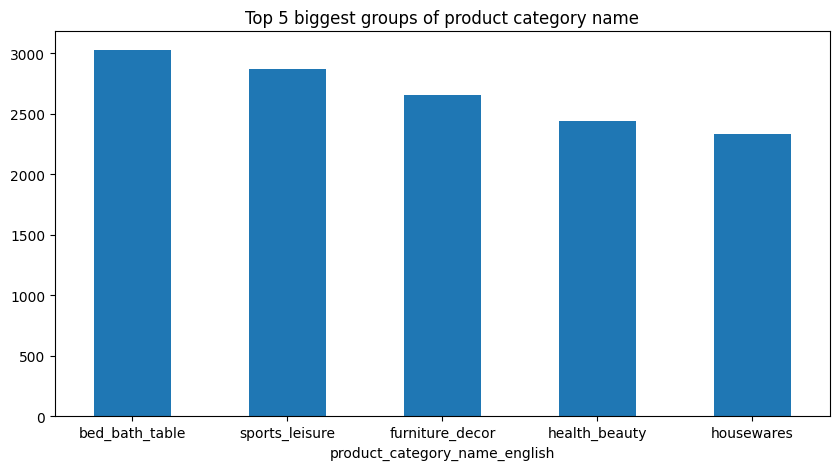

In [155]:
df_products["product_category_name_english"].value_counts().head(5).plot.bar(rot = 0, figsize = (10,5), title="Top 5 biggest groups of product category name")

In [156]:
df_products.head(1)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery


16. Sprawdzenie czy są przypadki gdzie product_weight / product_length/height/width <= 0 i usunięcie tych wartości

Tabela przechowująca informacje o dostępnych produktach w sklepie, każdy rekord przechowuje informacje o unikalnym asortymencie

In [157]:
mask = df_products["product_weight_g"] <= 0 # () | ()
print(f"Number of products that have product_weight <=0: {len(df_products.loc[mask])}")
mask = df_products["product_length_cm"] <= 0
print(f"Number of products that have product_length <=0: {len(df_products.loc[mask])}")
mask = df_products["product_height_cm"] <= 0
print(f"Number of products that have product_heigh <=0: {len(df_products.loc[mask])}")
mask = df_products["product_width_cm"] <= 0
print(f"Number of products that have product_width <=0: {len(df_products.loc[mask])}")

Number of products that have product_weight <=0: 4
Number of products that have product_length <=0: 0
Number of products that have product_heigh <=0: 0
Number of products that have product_width <=0: 0


17. Obliczenie m^3 objetosci ? paczki zamówienia -> product_height * length * width

In [158]:
df_products.head(1)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery


In [159]:
df_products["cubic_cm"] = df_products["product_length_cm"] * df_products["product_height_cm"] * df_products["product_width_cm"]
df_products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,cubic_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery,5120.0
1,00088930e925c41fd95ebfe695fd2655,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,auto,14300.0
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0,bed_bath_table,23625.0
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares,5472.0
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0,watches_gifts,3630.0


19. W tabeli 'olist_order_reviews_dataset' dodaj kolumne review_label ->

In [249]:
df_order_reviews = pd.read_sql('SELECT * FROM dbo.order_reviews', engine)
df_order_reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,4.0,None,None,2018-01-18,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,5.0,None,None,2018-03-10,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,5.0,None,None,2018-02-17,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,5.0,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,None,ParabĂ©ns lojas lannister adorei comprar pela ...,2018-03-01,2018-03-02 10:26:53


<Axes: title={'center': 'Distribution of review score among orders'}, xlabel='review_score'>

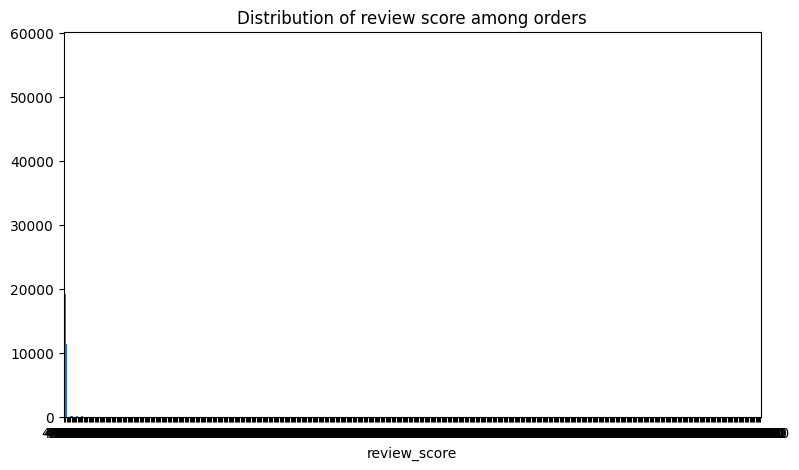

In [250]:
df_order_reviews["review_score"].value_counts().plot.bar(title="Distribution of review score among orders", x="review score", y="number of reviews", rot = 0, figsize=(9,5))

In [161]:
print(f"Length of dataframe: {len(df_order_reviews)}")
print(f"Number of duplicated rows: {len(df_order_reviews[df_order_reviews.duplicated()])}")
print("Number of NaN's: ")
df_order_reviews.isna().sum()


Length of dataframe: 104719
Number of duplicated rows: 3635
Number of NaN's: 


order_id                    2793
review_score                3073
review_comment_title       92714
review_comment_message     63674
review_creation_date        9324
review_answer_timestamp     9341
dtype: int64

In [162]:
df_order_reviews = df_order_reviews[~df_order_reviews.duplicated()]

In [163]:
# df_order_reviews["review_score"][df_order_reviews["review_score"]>5].value_counts()
print(f"Number of reviews with score higher than 5: {len(df_order_reviews[df_order_reviews["review_score"]>5])}")

Number of reviews with score higher than 5: 1585


In [164]:
df_order_reviews = df_order_reviews[df_order_reviews["review_score"] <= 5]

In [165]:
len(df_order_reviews)

99223

Liczba jest mniejsza ponieważ usunęliśmy NULLE

In [166]:
df_order_reviews.isna().sum()

order_id                       0
review_score                   0
review_comment_title       87655
review_comment_message     58286
review_creation_date        3851
review_answer_timestamp     3851
dtype: int64

In [167]:
review_labels = {
    1: "Terrible",
    2: "Bad",
    3: "Average",
    4: "Good",
    5: "Excellent"
}

In [168]:
df_order_reviews["review_label"] = df_order_reviews["review_score"].map(review_labels)

<Axes: title={'center': 'Number of reach score in reviews'}, xlabel='review_label'>

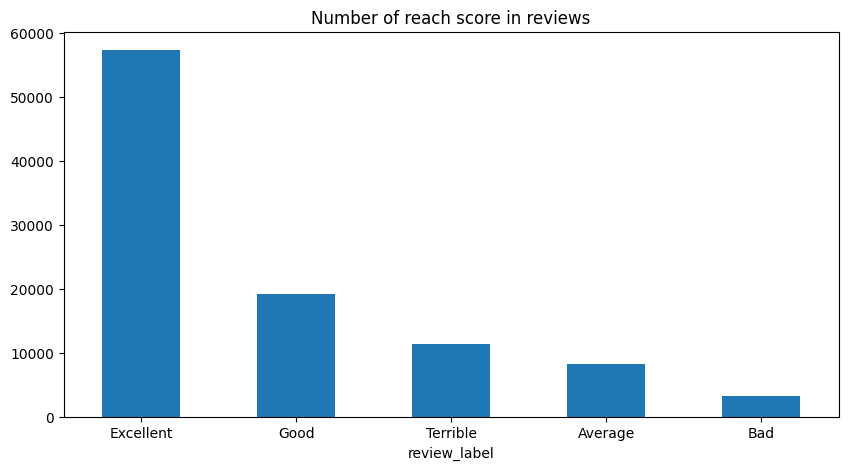

In [169]:
df_order_reviews["review_label"].value_counts().head().plot.bar(rot = 0, figsize = (10,5), title = "Number of reach score in reviews")

20. W tabeli 'olist_order_reviews_dataset' dodaj kolumne NPS/lub inna, w zaleznosci od wartości w kolumnie review_score będzie uzupełniane jako promotor/neutralny i negatywny

In [170]:
loyalty_labels = {
    1: "Detractor",
    2: "Detractor",
    3: "Passive",
    4: "Promoter",
    5: "Promoter"
}

In [171]:
df_order_reviews["loyalty_labels"] = df_order_reviews["review_score"].map(loyalty_labels)
df_order_reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_label,loyalty_labels
0,73fc7af87114b39712e6da79b0a377eb,4.0,None,None,2018-01-18,2018-01-18 21:46:59,Good,Promoter
1,a548910a1c6147796b98fdf73dbeba33,5.0,None,None,2018-03-10,2018-03-11 03:05:13,Excellent,Promoter
2,f9e4b658b201a9f2ecdecbb34bed034b,5.0,None,None,2018-02-17,2018-02-18 14:36:24,Excellent,Promoter
3,658677c97b385a9be170737859d3511b,5.0,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,Excellent,Promoter
4,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,None,ParabĂ©ns lojas lannister adorei comprar pela ...,2018-03-01,2018-03-02 10:26:53,Excellent,Promoter
